In [ ]:
# import necessary libraries for ETL process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



# Load CSV into a Pandas dataframe

df = pd.read_csv('https://gist.githubusercontent.com/javierIA/52184893d57d9a644e2362ee108cfa9e/raw/7297193ea28a0ebed89cb230034a0e62043fe288/bills.csv')
df.head()

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = df.drop(['is_genuine', 'Unnamed: 0'], axis=1)
y = df['is_genuine']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Model Training
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = knn_classifier.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9833333333333333


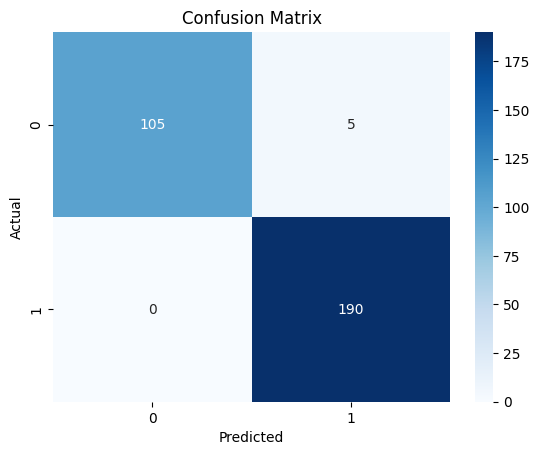

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


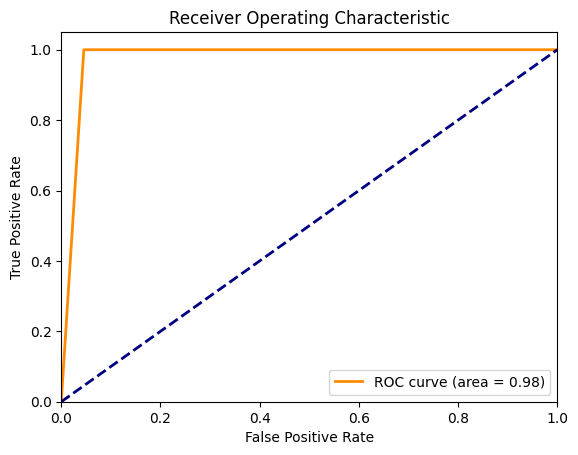

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
